In [11]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [34]:
from scipy import signal
def denoise_image(inp):
    # estimate 'background' color by a median filter
    bg = signal.medfilt2d(inp, 3)

    # compute 'foreground' mask as anything that is significantly darker than
    # the background
    mask = inp > bg - 0.1

    # return the input value for all pixels in the mask or pure white otherwise
    return np.where(mask, inp, 1.0)

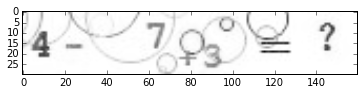

In [228]:
from skimage import io
from skimage.color import rgb2gray

img = io.imread('./cases/22964176_0.png')
img = rgb2gray(img)
imshow(img, cmap=cm.Greys_r)

(0.54569239215686272, 12, 0)
(0.7131176274509804, 17, 82)
(0.75220329411764708, 10, 106)
(0.75775235784313721, 6, 55)
(0.8052134019607845, 16, 70)


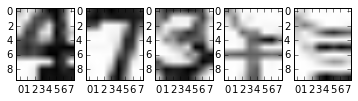

In [229]:
xlen = 10
ylen = 8
def computeDensity(img, x, y):
    if x+xlen >= img.shape[0] or y+ylen >= img.shape[1]:
        return 1
    return np.average(img[x:x+xlen, y:y+ylen])

def extract_icons(img):
    sub_img = img[:, 5:120]
    all_desity = []
    for (x, y), e in np.ndenumerate(sub_img):
        d = computeDensity(sub_img, x, y)
        all_desity.append((d, x, y))

    already_used = []
    candidates = []
    useful_imgs = []
    fig, axes = plt.subplots(1,5)
    for k in sorted(all_desity, key=lambda k:k[0]):
        if k[2] in already_used:
            continue
        for i in range(-10, 15):
            already_used.append(k[2]+i)
        if len(candidates) < 5:
            candidates.append(k)

    i = 0
    for k in sorted(candidates[:3], key=lambda k:k[2]):
        print(k)
        useful_imgs.append(sub_img[k[1]:k[1]+xlen, k[2]:k[2]+ylen])
        axes[i*2].imshow(useful_imgs[-1], cmap=cm.Greys_r)
        i += 1

    i = 0
    for k in sorted(candidates[3:], key=lambda k:k[2]):
        print(k)
        useful_imgs.append(sub_img[k[1]:k[1]+xlen, k[2]:k[2]+ylen])
        axes[i*2+1].imshow(useful_imgs[-1], cmap=cm.Greys_r)
        i += 1

    #for i in useful_imgs:
    #    imsave('./training_icons/'+str(randint(0, 1000))+'.png', i, cmap=cm.Greys_r)
        

extract_icons(img)

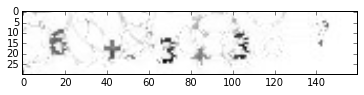

In [54]:
img2 = denoise_image(img)
imshow(img2, cmap = cm.Greys_r)

In [38]:
print(img2)

[[ 0.79868941  0.81045412  0.82835765 ...,  0.99719451  0.99438902
   0.99438902]
 [ 0.80142667  0.78431882  0.76105725 ...,  0.99719451  0.99719451
   0.99438902]
 [ 0.98276784  0.98470235  0.97601882 ...,  0.99719451  0.99719451
   0.99719451]
 ..., 
 [ 0.98877804  0.98877804  0.99045255 ...,  1.          1.          1.        ]
 [ 0.99325804  0.99325804  0.99297529 ...,  1.          1.          1.        ]
 [ 0.99578078  0.99578078  0.99521529 ...,  1.          1.          1.        ]]
